- apples width ≈ 6cm
- apples length ≈ 6cm
- bananas width ≈ 4cm
- bananas length ≈ 8cm
- watermelon width = 35cm
- watermelon length = 60cm

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Set mean and standard deviation for each fruit's dimensions

In [47]:
apple_width, apple_length = 6, 6
banana_width, banana_length = 4, 8
watermelon_width, watermelon_length = 35, 60

Generate random widths and lengths

In [48]:
n = 150

apple_widths = np.random.normal(loc=apple_width, scale=0.5, size=n)
apple_lengths = np.random.normal(loc=apple_length, scale=0.5, size=n)

banana_widths = np.random.normal(loc=banana_width, scale=0.5, size=n)
banana_lengths = np.random.normal(loc=banana_length, scale=0.5, size=n)

watermelon_widths = np.random.normal(loc=watermelon_width, scale=1, size=n)
watermelon_lengths = np.random.normal(loc=watermelon_length, scale=1, size=n)

Combine the data into a DataFrame

In [49]:
df = pd.DataFrame({
    'target': ['apple'] * n + ['banana'] * n + ['watermelon'] * n,
    'width': np.concatenate([apple_widths, banana_widths, watermelon_widths]),
    'length': np.concatenate([apple_lengths, banana_lengths, watermelon_lengths])
})

Show DataFrame

In [50]:
df.head(10)

,target,width,length
0,apple,5.604422,5.931787
1,apple,5.458971,5.333600
2,apple,6.910683,5.184137
3,apple,5.935475,5.206714
4,apple,6.019722,6.277416
5,apple,5.904749,5.715362
6,apple,6.253047,5.826947
7,apple,5.273557,5.669230
8,apple,5.534264,6.288366
9,apple,5.844021,6.237647


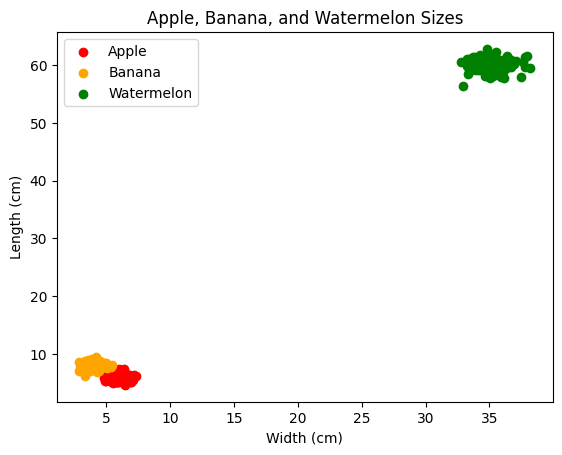

In [51]:
plt.scatter(apple_widths,apple_lengths,c='red', label='Apple')
plt.scatter(banana_widths,banana_lengths,c='orange', label='Banana')
plt.scatter(watermelon_widths,watermelon_lengths,c='green', label='Watermelon')
plt.title('Apple, Banana, and Watermelon Sizes')
plt.xlabel('Width (cm)')
plt.ylabel('Length (cm)')
plt.legend()
plt.show()

Create X and y train

In [52]:
X_train = df[['width', 'length']]

X_train = X_train.values

print(X_train[:5])


[[5.60442245 5.93178722]
 [5.45897094 5.33360013]
 [6.91068334 5.18413682]
 [5.93547458 5.20671369]
 [6.01972154 6.2774159 ]]


In [53]:
y_train = df['target']

y_train = y_train.values

print(y_train[:5])

['apple' 'apple' 'apple' 'apple' 'apple']


Definition of Euclidean distance

In [54]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [55]:
new_fruit = np.array([60 , 40])

In [56]:
distances = []
for x in X_train:
    d = euclidean_distance(new_fruit,x)
    distances.append(d)

distances

[np.float64(64.18350238739876),
 np.float64(64.62571570924854),
 np.float64(63.487163052287706),
 np.float64(64.29265651135428),
 np.float64(63.64811969137075),
 np.float64(64.04476992866302),
 np.float64(63.6909141734516),
 np.float64(64.60329185087646),
 np.float64(64.05459098321892),
 np.float64(63.81823022086906),
 np.float64(63.15568901315721),
 np.float64(63.618013161093046),
 np.float64(64.37499992470848),
 np.float64(63.76767211520259),
 np.float64(64.24565302550548),
 np.float64(64.28628084476999),
 np.float64(62.9275322035501),
 np.float64(63.10497445935608),
 np.float64(63.15696783867261),
 np.float64(63.43119689936937),
 np.float64(62.58762968856315),
 np.float64(63.39187794464482),
 np.float64(62.901542844762794),
 np.float64(63.87854917711177),
 np.float64(63.43568793588731),
 np.float64(63.817795286941326),
 np.float64(64.04164508376402),
 np.float64(64.06157960157567),
 np.float64(63.504459804813095),
 np.float64(64.39327386236415),
 np.float64(64.1140571648208),
 np.fl

In [57]:
np.sort(distances)

array([28.80350245, 29.24308604, 29.70323979, 29.72574609, 30.00916922,
       30.2923041 , 30.41631834, 30.43445925, 30.55882144, 30.59747767,
       30.60281311, 30.61528232, 30.61982831, 30.64187708, 30.64573983,
       30.83431517, 30.89291073, 30.89992859, 30.92574495, 31.00258099,
       31.04083028, 31.08426569, 31.13707304, 31.17033678, 31.23686821,
       31.25442632, 31.28911123, 31.30020566, 31.32197929, 31.3234909 ,
       31.32411279, 31.3515516 , 31.35641107, 31.41251384, 31.43641746,
       31.44098801, 31.46194004, 31.47494189, 31.4920297 , 31.55691191,
       31.58441296, 31.58695493, 31.60547084, 31.62588495, 31.62749714,
       31.63887111, 31.65412497, 31.66931322, 31.69482503, 31.73393021,
       31.75237395, 31.76287254, 31.7781819 , 31.78842301, 31.83004352,
       31.85234432, 31.86088663, 31.86534291, 31.87812343, 31.912295  ,
       31.94954002, 31.95281399, 31.95311521, 31.95760399, 31.97690491,
       31.99643903, 32.00422452, 32.02379936, 32.0276831 , 32.02

KNN method

In [58]:
k = 5

nearest_neighbors = np.argsort(distances)[:k]

labels = y_train[nearest_neighbors]
labels

array(['watermelon', 'watermelon', 'watermelon', 'watermelon',
       'watermelon'], dtype=object)

In [59]:
from collections import Counter

common_label = Counter(labels).most_common()
common_label

[('watermelon', 5)]

In [60]:
most_common_label = Counter(labels).most_common(1)[0][0]

if most_common_label == 'apple':
    print('🍎 Apple')
elif most_common_label == 'banana':
    print('🍌 Banana')
else:
    print('🍉 Watermelon')

🍉 Watermelon
